# Permutation testing with a small sample population

The purpose of this experiment is to explore permutation testing with a small and contrived population for easier visualization of what permutation testing is and how it works. I have created an imagionary basketball game where a team of data scientists play against a team of professional basketball players, and unsurprisingly, the professional basketball players won by a wide margin. But can we say from this game that the pro team is "better" than the data team? If so, can we measure how much better they are? One way would be to repeat the experiment, have the two teams play over and over and average the scores. But if this game was a one-time exhibition event we can try to compare these two teams using permutation testing. Instead of iterating the event of the game to produce new scores, we can iterate the event of the game that happened by shuffling the players and creating imaginary new teams. Since there are 2 teams of 5 players, we know that there are n!/(n-k)!k! combinations, or , 252 possible arrangements of players. If the members of the pro team are indeed better by a statistically significant amount, we would expect that as we shuffle the players around we would not be able to create a new team that performs better on average than they did in the real game. So how do the two teams stack up? Lets find out!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


creating a data frame with the scores of the two teams.


In [2]:
stats = {'data team':[2, 0, 3, 5, 2], 'pro team':[21, 32, 22, 40, 35]}
data = pd.DataFrame(data = stats)
data

,data team,pro team
0,2,21
1,0,32
2,3,22
3,5,40
4,2,35


In [3]:
data_mean = np.mean(data['data team'])
pro_mean = data['pro team'].mean()
mean_difference = pro_mean - data_mean
total_points = data['data team'].sum() + data['pro team'].sum()


Below is a scatter graph of the players by team with a horizontal line representing the team's average score. 

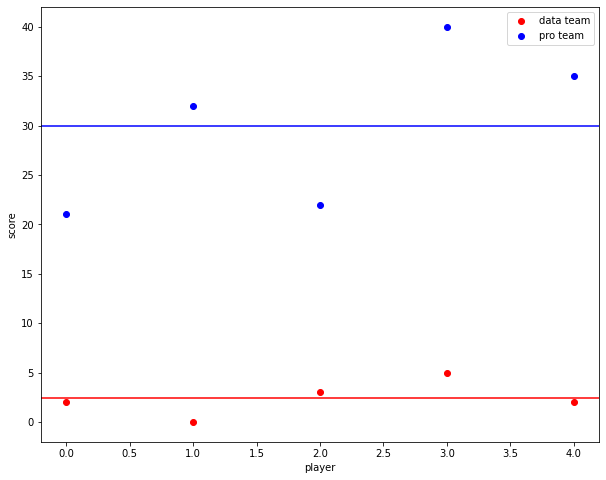

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(x=data.index, y=data['data team'], c='r', label='data team')
plt.scatter(x=data.index, y=data['pro team'], c='b', label='pro team')
plt.legend()
plt.xlabel('player')
plt.ylabel('score')
plt.axhline(data_mean, c='r')
plt.axhline(pro_mean, c='b')
plt.show()

In [5]:
allplayers = pd.concat([data['data team'], data['pro team']], axis=0, ignore_index=True)
allplayers

0     2
1     0
2     3
3     5
4     2
5    21
6    32
7    22
8    40
9    35
dtype: int64

Here is a quick calculation for the combinations, or number of possible unique team arrangements. I used the formula for combinations, not permutations, since the order of the players does not matter, only which players are on a given team.

In [6]:
def fact(n):
    x = n
    l = n
    for v in range(1,n):
        if l != 0: 
            x*=(n-v)
            l-=1
    return(x)

n=10
k=5
number_of_players = n
players_per_team = k
team_combinations = fact(n) / (fact(n-k)*fact(k))
print(team_combinations)

252.0


In [7]:
means252 = []
for n in range(252):
    order = np.random.permutation(allplayers)
    a = sum(order[:5])/len(order[:5])
    b = sum(order[5:])/len(order[5:])
    if a>=b:
        means252.append(a-b)
    else:
        means252.append(b-a)

I have taken the players scores and randomly reassigned them to equal sized teams 252 times and computed the absolute value of the difference of the teams average scores. The red dot represents the difference of the average scores of the original game. As expected, of the possible combinations of players the original pro team performs the best. This tells us that the pro team didnt win because of one superstar player, and that the data team wasnt just being dragged down by one underperformer. 

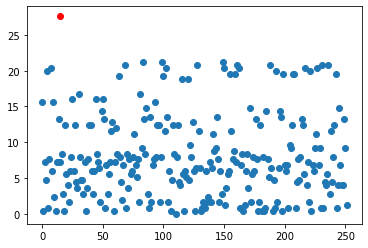

In [8]:
meanies = pd.Series(means252)
plt.scatter(x=meanies.index, y=meanies)
plt.scatter(x=15, y=mean_difference, c='r')

Out of curiosity, I decided to iterate this a few more times. Even though there are only 252 possible team combinations I ran this test 1000 times and started to see trends on the graph.


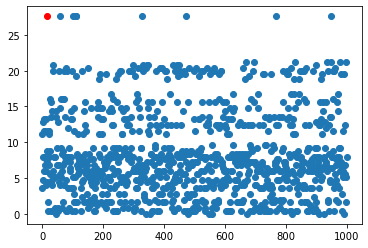

In [9]:
means1000 = []
for n in range(1000):
    order = np.random.permutation(allplayers)
    a = sum(order[:5])/len(order[:5])
    b = sum(order[5:])/len(order[5:])
    if a>=b:
        means1000.append(a-b)
    else:
        means1000.append(b-a)

meanies = pd.Series(means1000)
plt.scatter(x=meanies.index, y=meanies)
plt.scatter(x=15, y=mean_difference, c='r')

At 5000 iterations patterns become very clear and the data starts to present itself in rows. The top row are the original team lineups and has the highest difference in average scores. But below that, we see another band that represents a slightly lower difference of team averages. These are the teams where 1 of the pro team has been swapped with 1 of the data team. This band is wider than the highest band, because there are 25 different arrangements where 1 pro team member is swapped for 1 data team member, and only 2 possible arragements where all the pro team members are on one team. After that, identifying the underlying trend for the next two bands is beyond the scope of this project, but it is interesting to note that the winning team will always have 3 pro players on it, yet there appear to be possible arrangements where the difference between the team averages is near zero. 

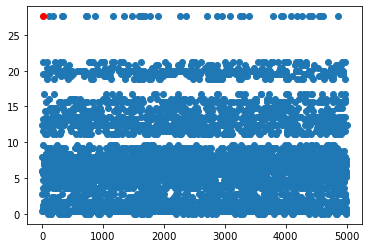

In [10]:
means5000 = []
for n in range(5000):
    order = np.random.permutation(allplayers)
    a = sum(order[:5])/len(order[:5])
    b = sum(order[5:])/len(order[5:])
    if a>=b:
        means5000.append(a-b)
    else:
        means5000.append(b-a)

#plt.figure(figsize=(8,10))
meanies = pd.Series(means5000)
plt.scatter(x=meanies.index, y=meanies)
plt.scatter(x=15, y=mean_difference, c='r')
plt.show()

Below we can see that the pattern mirrors itself over the x axis if we use the difference of team mean points instead of the absolute difference of team mean points.

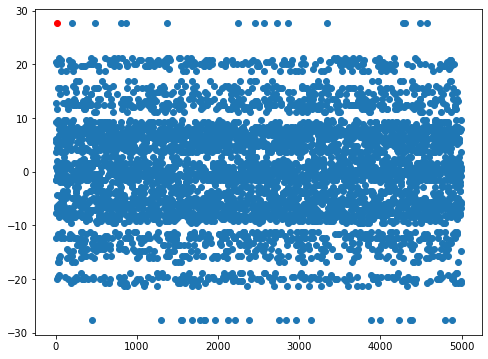

In [11]:
means5000 = []
for n in range(5000):
    order = np.random.permutation(allplayers)
    a = sum(order[:5])/len(order[:5])
    b = sum(order[5:])/len(order[5:])
    means5000.append(b-a)

plt.figure(figsize=(8,6))
meanies = pd.Series(means5000)
plt.scatter(x=meanies.index, y=meanies)
plt.scatter(x=15, y=mean_difference, c='r')
plt.show()

For this graph I assigned players to teams at random, but did not constrain the teams to just 5 players each. For some iterations one of the teams even had 0 players! However, since I am using the difference of teams mean scores, not total scores, this method results in a graph similar to the one above but has a much smoother overall distribution . While not particularly useful in this case, it might be a helpful way to isolate outlier performers in some other cases. 

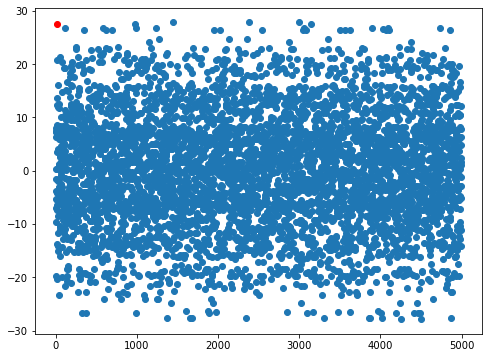

In [20]:
scores5000 = []
for n in range(5000):
    team_a = []
    team_b = []
    for player in allplayers:
        cointoss  = np.random.rand()
        if cointoss >= 0.5:
            team_a.append(player)
        else:
            team_b.append(player)
    if len(teama) >= 1:
        a = np.mean(team_a)
    else:
        a = 0
    if len(teamb) >= 1:
        b = np.mean(team_b)
    else:
        b = 0
    scores5000.append(b-a)
plt.figure(figsize=(8,6))
scores = pd.Series(scores5000)
plt.scatter(x=scores.index, y=scores)
plt.scatter(x=15, y=mean_difference, c='r')
plt.show()


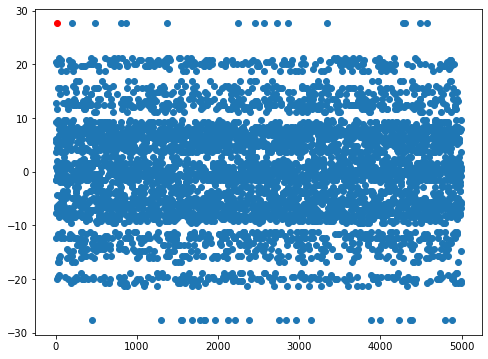

In [13]:
scores5000 = []
for n in range(5000):
    team_a = []
    team_b = []
    for player in allplayers:
        cointoss  = np.random.rand()
        if cointoss >= 0.5:
            team_a.append(player)
        else:
            team_b.append(player)
            
    a = np.sum(team_a)
    b = np.sum(team_b)
    scores5000.append(b-a)
plt.figure(figsize=(8,6))
meanies = pd.Series(means5000)
plt.scatter(x=meanies.index, y=meanies)
plt.scatter(x=15, y=mean_difference, c='r')
plt.show()

In [14]:
win_score = []
score_dif = []
abs_score_dif = []
win_order = []
t_a = []
t_b = []
for n in range(500):
    order = np.random.permutation(allplayers)
    teama =order[:5]
    t_a.append(order[:5])
    teamb = order[5:]
    t_b.append(order[5:])
    a = sum(teama)
    b = sum(teamb)
    score_dif.append(b-a)
    if a>=b:
        win_score.append(a)
        abs_score_dif.append(a-b)
        win_order.append(teama)
    else:
        win_score.append(b)
        abs_score_dif.append(b-a)
        win_order.append(teamb)

Changing it up a bit, I created a new data frame using random team assignments, but this time instead of team averages, I used the actual team scores, then found the margin of victory and the absolute score for 500 games.

In [15]:
info = {'winning score':win_score, 'win margin':score_dif, 'absolute score':abs_score_dif}
scores = pd.DataFrame(data=info)
scores.head()


,winning score,win margin,absolute score
0,100,38,38
1,95,-28,28
2,120,78,78
3,96,-30,30
4,90,-18,18


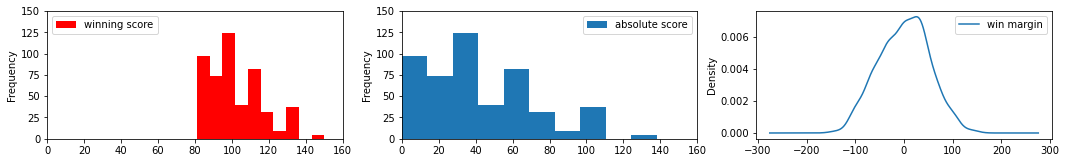

In [16]:
plt.figure(figsize=(18,8))
plt.subplot(331)
plt.axis([0,160,0,150])
scores['winning score'].plot.hist(color='r')
plt.legend()
plt.subplot(332)
plt.axis([0,160,0,150])
scores['absolute score'].plot.hist()
plt.legend()
plt.subplot(333)
scores['win margin'].plot.kde()
plt.legend()
plt.show()


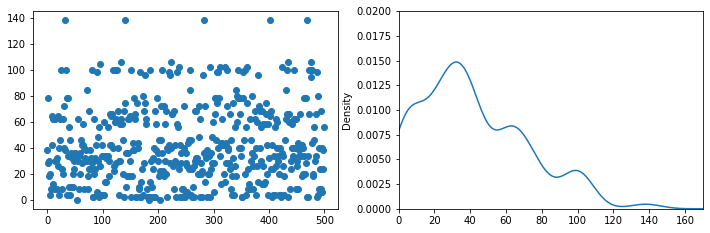

In [17]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.scatter(x=scores.index, y=scores['absolute score'])
plt.subplot(222)
plt.axis([0,170,0,.02])
scores['absolute score'].plot.kde()